In [1]:
from brainspace.utils.parcellation import reduce_by_labels, map_to_labels
from brainspace.gradient import GradientMaps
import numpy as np
import pandas as pd
import nibabel as nib
import seaborn as sns

from nilearn.connectome import ConnectivityMeasure

import matplotlib.pyplot as plt

In [2]:
# Restructure Connectome WB label table
labels_gii = nib.load('/scratch/dimuthu1/PPMI_project2/PPMI_gradients/cfg/Schaefer2018_1000Parcels_7Networks_order.dlabel.nii').get_fdata()
labels_txt = pd.read_csv('/scratch/dimuthu1/PPMI_project2/PPMI_gradients/cfg/Schaefer2018_1000Parcels_7Networks_order_info.txt',header=None)

df1 = labels_txt[labels_txt.index % 2 != 0].reset_index()
df2 = labels_txt[labels_txt.index % 2 == 0].reset_index()
labels_txt = pd.concat((df1[0].rename('Label'), df2[0].rename('Name')),axis=1) #.columns(['Label','Name'])
labels_txt[['Label','Red','Green','Blue','Alpha']] = labels_txt['Label'].str.split(' ',expand=True)
labels_txt[['Name','Hemisphere','Network','Area','SubArea']] = labels_txt['Name'].str.split('_',expand=True)

dtseries      = nib.load('/scratch/dimuthu1/PPMI_project2/PPMI_gradients/sample_data/sub-3118_Month12_clean.dtseries.nii')
dtseries_data = np.transpose(dtseries.get_fdata())[:len(labels_gii[0])]


#extracting cortex tseries
reduced_ts = np.zeros((len(labels_txt),dtseries_data.shape[1]))
for i,label in enumerate(labels_txt.Label):
    mask = (labels_gii==int(label))[0]
    reduced_ts[i,:] = np.nanmean(dtseries_data[mask,:], axis=0)  

reduced_ts = reduced_ts.T
ctx_mean_ts = np.where(np.isnan(reduced_ts), np.ma.array(reduced_ts, mask=np.isnan(reduced_ts)).mean(axis=0), reduced_ts) 

#extracting subcortex tseries
atlas = nib.load('/scratch/dimuthu1/PPMI_project2/PPMI_gradients/cfg/91282_Greyordinates.dscalar.nii').get_fdata()
dtseries_data = dtseries.get_fdata()

put_L = dtseries_data[:,(atlas[0]==12)]
put_R = dtseries_data[:,(atlas[0]==51)]
cau_L = dtseries_data[:,(atlas[0]==11)]
cau_R = dtseries_data[:,(atlas[0]==50)]
acc_L = dtseries_data[:,(atlas[0]==26)]
acc_R = dtseries_data[:,(atlas[0]==58)]


subctx_ts = np.concatenate((put_L, cau_L, acc_L, put_R, cau_R, acc_R),axis=1)

#combining cortex and sub cortex
combined_ts = np.concatenate((ctx_mean_ts,subctx_ts), axis=1)

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([combined_ts])[0]






pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


IndexError: boolean index did not match indexed array along dimension 1; dimension is 91282 but corresponding boolean dimension is 64984

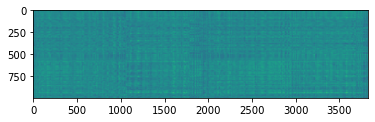

In [20]:
plt.imshow(sliced_sbctx_matrix)


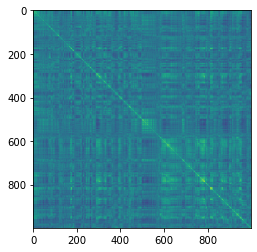

In [21]:
plt.imshow(sliced_ctx_matrix)